 Neovya - Data exploration - Sensors & timeseries

## Imports & chargement des données

In [108]:
import pandas as pd
import numpy as np
import descartes
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from shapely.geometry import Point, Polygon
import datetime
import statsmodels.api as sm 

%matplotlib inline

In [61]:
df = pd.read_csv('/Users/hugo/neovya/Data/Bordeaux_sensordef.csv', sep=';')
df_timeseries = pd.read_csv('/Users/hugo/neovya/Data/Bordeaux_sensortimeseries.csv', sep=';')

# Exploration du premier jeu de données: df_sensor

In [3]:
#Columns
df.columns

Index(['sensor', 'source', 'info', 'link', 'position_on_link_[m]', 'lat',
       'lon', 'muted'],
      dtype='object')

In [4]:
#Shape
df.shape

(133, 8)

In [5]:
#Types
df.dtypes

sensor                   object
source                   object
info                     object
link                      int64
position_on_link_[m]    float64
lat                     float64
lon                     float64
muted                      bool
dtype: object

In [6]:
df

,sensor,source,info,link,position_on_link_[m],lat,lon,muted
0,S_MB333.F_0,DIR Atlantique,ech3 - sens extérieur,364,111.434103,44.879983,-0.525714,True
1,S_MB333.F_1,DIR Atlantique,ech3 - sens inter,198,60.419032,44.879869,-0.525645,True
2,S_MB333.F_2,DIR Atlantique,ech3 - sortie extérieur,63,131.449616,44.879930,-0.525983,True
3,S_MB333.E_0,DIR Atlantique,ech2 - sens exter,57,146.433858,44.884118,-0.519036,True
4,S_MB333.E_1,DIR Atlantique,ech2 - sens inter,185,272.844830,44.884036,-0.518900,True
...,...,...,...,...,...,...,...,...
128,LAPI L22,ALYCE,A10 vers Paris,332,830.775255,44.936122,-0.467200,False
129,LAPI L31,ALYCE,RN89 vers Bordeaux,350,83.416013,44.869539,-0.467172,False
130,LAPI L32,ALYCE,RN89 vers Libourne,343,310.321130,44.869129,-0.469238,False
131,LAPI L41,ALYCE,Rocade vers Nord,319,76.558151,44.815794,-0.520793,False


## Etude de la première colonne: sensor

Sensor correspond au nom de chaque capteur 

In [7]:
df

,sensor,source,info,link,position_on_link_[m],lat,lon,muted
0,S_MB333.F_0,DIR Atlantique,ech3 - sens extérieur,364,111.434103,44.879983,-0.525714,True
1,S_MB333.F_1,DIR Atlantique,ech3 - sens inter,198,60.419032,44.879869,-0.525645,True
2,S_MB333.F_2,DIR Atlantique,ech3 - sortie extérieur,63,131.449616,44.879930,-0.525983,True
3,S_MB333.E_0,DIR Atlantique,ech2 - sens exter,57,146.433858,44.884118,-0.519036,True
4,S_MB333.E_1,DIR Atlantique,ech2 - sens inter,185,272.844830,44.884036,-0.518900,True
...,...,...,...,...,...,...,...,...
128,LAPI L22,ALYCE,A10 vers Paris,332,830.775255,44.936122,-0.467200,False
129,LAPI L31,ALYCE,RN89 vers Bordeaux,350,83.416013,44.869539,-0.467172,False
130,LAPI L32,ALYCE,RN89 vers Libourne,343,310.321130,44.869129,-0.469238,False
131,LAPI L41,ALYCE,Rocade vers Nord,319,76.558151,44.815794,-0.520793,False


In [8]:
#Fonction pour afficher tous les éléments
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
#Etude de l'ensemble des capteurs:
display_all(df['sensor'])

0      S_MB333.F_0
1      S_MB333.F_1
2      S_MB333.F_2
3      S_MB333.E_0
4      S_MB333.E_1
5      S_MB333.E_2
6      S_MB333.E_3
7      S_MB333.E_4
8      S_MB333.E_5
9      S_MB333.A_0
10     S_MB333.A_1
11     S_MB333.A_2
12     S_MB333.A_3
13     S_MB333.A_4
14     S_MBG33.n_0
15     S_MBG33.n_1
16     S_MB333.e_0
17     S_MB333.e_1
18     S_MB333.e_2
19     S_MB333.e_4
20     S_MB333.e_5
21     S_MB333.e_6
22     S_MB333.e_8
23     S_MB333.e_9
24     S_MB333.G_0
25     S_MB333.G_1
26     S_MB333.G_2
27     S_MBG33.V_1
28     S_MBG33.V_0
29     S_MBG33.T_1
30     S_MBG33.T_0
31     S_MBG33.R_1
32     S_MBG33.R_0
33     S_MB333.M_0
34     S_MB333.M_1
35     S_MBG33.N_0
36     S_MBG33.N_1
37     S_MB233.V_1
38     S_MB233.V_0
39     S_MB333.D_1
40     S_MB333.D_0
41     S_MBG33.M_0
42     S_MBG33.M_1
43     S_MBG33.M_2
44     S_MBG33.M_3
45     S_MBG33.M_4
46     S_MBG33.M_5
47     S_MB333.x_3
48     S_MB333.x_0
49     S_MB333.x_2
50     S_MB333.x_1
51       5442.21 2
52       544

In [10]:
len(df.sensor.value_counts())

133

Interpretation: 
3 differents types de noms de capteurs: S_MB..., 5421..., LAPI L...
A première vue, la colonne ne semble pas comporter d'erreur
 

## Etude de la seconde colonne: source

"Source" correspond au nom de l'entreprise ayant réalisé les prises de mesures

In [11]:
#Observation des valeurs présentes dans la colonne "source"
df['source'].value_counts()

DIR Atlantique    123
ALYCE              10
Name: source, dtype: int64

Interprétation: Uniquement deux sources différentes 

## Etude de la troisième colonne: info 



"Info" correspond à un champ d'information, libre, qui n'est pas utile pour nous. L’information contenu dépend de qui l’a rempli.

In [12]:
df['info']

0        ech3 - sens extérieur
1            ech3 - sens inter
2      ech3 - sortie extérieur
3            ech2 - sens exter
4            ech2 - sens inter
                ...           
128             A10 vers Paris
129         RN89 vers Bordeaux
130         RN89 vers Libourne
131           Rocade vers Nord
132            Rocade vers sud
Name: info, Length: 133, dtype: object

## Etude de la quatrième colonne: link

"Link" correspond à une information qui n'est pas recceuillie sur le terrain. Dans l'entreprise Neovya, lorsque les données sont chargées dans leur application 'Hubsim', elles sont automatiquement rattachées à un réseau routier composé de lien "link" numéroté de 1 à n. Il s'agit ici du numéro du lien.

In [13]:
df.link.value_counts()

317    5
379    5
353    3
307    3
180    3
      ..
237    1
350    1
343    1
332    1
259    1
Name: link, Length: 81, dtype: int64

## Etude de la cinquième colonne: position_on_link

"position_on_link" correspond à la position du lien (ex : 50m signifie que le capteur est situé à 50 m à compter du début du lien)

In [14]:
df['position_on_link_[m]'].value_counts()

77.436905      1
37.599506      1
409.331724     1
211.252034     1
1726.175728    1
              ..
154.912893     1
66.436579      1
134.303657     1
584.494005     1
346.455230     1
Name: position_on_link_[m], Length: 133, dtype: int64

## Etude des colonnes cinq & six: "lat" & "lon"

"lat" corresond à la lattitude et "lon" correspond à la longitude

In [15]:
df.lat

0      44.879983
1      44.879869
2      44.879930
3      44.884118
4      44.884036
         ...    
128    44.936122
129    44.869539
130    44.869129
131    44.815794
132    44.815794
Name: lat, Length: 133, dtype: float64

Les valeurs semblent justes, elles sont toutes regroupées autour de 44.8

In [16]:
(df.lon)

0     -0.525714
1     -0.525645
2     -0.525983
3     -0.519036
4     -0.518900
         ...   
128   -0.467200
129   -0.467172
130   -0.469238
131   -0.520793
132   -0.520626
Name: lon, Length: 133, dtype: float64

Les valeurs semblent également justes

## Etude de la septième colonne: "muted"

In [17]:
df.muted

0       True
1       True
2       True
3       True
4       True
       ...  
128    False
129    False
130    False
131    False
132    False
Name: muted, Length: 133, dtype: bool

Nous n'avons pas d'information sur le contenu de cette colonne

# Exploration  du second jeu de données: timeseries

In [18]:
df_timeseries.shape

(498311, 11)

In [19]:
df_timeseries.columns

Index(['day', 'sensor', 'time_[s]', 'speed_[km/h]', 'occupancy_[%]', 'TV/h',
       'PL/h', 'VL/h', 'speed_per_lane', 'occupancy_per_lane',
       'flow_per_lane_[veh/h]'],
      dtype='object')

In [20]:
df_timeseries.dtypes

day                       object
sensor                    object
time_[s]                   int64
speed_[km/h]             float64
occupancy_[%]            float64
TV/h                     float64
PL/h                     float64
VL/h                     float64
speed_per_lane            object
occupancy_per_lane        object
flow_per_lane_[veh/h]     object
dtype: object

In [21]:
df_timeseries

,day,sensor,time_[s],speed_[km/h],occupancy_[%],TV/h,PL/h,VL/h,speed_per_lane,occupancy_per_lane,flow_per_lane_[veh/h]
0,01/09/2019,S_MB333.F_0,3600,NaN,NaN,NaN,11.0,959.0,[],[],[]
1,01/09/2019,S_MB333.F_0,7200,NaN,NaN,NaN,8.0,804.0,[],[],[]
2,01/09/2019,S_MB333.F_0,10800,NaN,NaN,NaN,7.0,509.0,[],[],[]
3,01/09/2019,S_MB333.F_0,14400,NaN,NaN,NaN,6.0,284.0,[],[],[]
4,01/09/2019,S_MB333.F_0,18000,NaN,NaN,NaN,12.0,294.0,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
498306,20/10/2019,LAPI L42,84600,88.0,NaN,NaN,110.0,410.0,[],[],[]
498307,20/10/2019,LAPI L42,84960,85.0,NaN,NaN,140.0,550.0,[],[],[]
498308,20/10/2019,LAPI L42,85320,90.0,NaN,NaN,120.0,470.0,[],[],[]
498309,20/10/2019,LAPI L42,85680,86.0,NaN,NaN,100.0,410.0,[],[],[]


In [22]:
df_timeseries.isnull().sum()

day                           0
sensor                        0
time_[s]                      0
speed_[km/h]             190333
occupancy_[%]            498311
TV/h                     175801
PL/h                     356081
VL/h                     356081
speed_per_lane                0
occupancy_per_lane            0
flow_per_lane_[veh/h]         0
dtype: int64

## Etude de la première colonne: day

Day correspond au jour où la mesure a été prise

In [23]:
df_timeseries.day

0         01/09/2019
1         01/09/2019
2         01/09/2019
3         01/09/2019
4         01/09/2019
             ...    
498306    20/10/2019
498307    20/10/2019
498308    20/10/2019
498309    20/10/2019
498310    20/10/2019
Name: day, Length: 498311, dtype: object

In [24]:
df_timeseries.day.value_counts()

13/10/2019    16584
16/10/2019    16584
08/10/2019    16512
06/10/2019    16512
14/10/2019    16344
              ...  
12/09/2018       96
08/10/2018       96
10/09/2018       92
30/10/2019       50
22/10/2018        4
Name: day, Length: 103, dtype: int64

In [25]:
display_all(df_timeseries.day.value_counts())

13/10/2019    16584
16/10/2019    16584
08/10/2019    16512
06/10/2019    16512
14/10/2019    16344
18/10/2019    16344
11/10/2019    16344
15/10/2019    16344
17/10/2019    16344
12/10/2019    16344
10/10/2019    16341
09/10/2019    16272
03/10/2019    16272
07/10/2019    16272
05/10/2019    16272
23/09/2019    16272
30/09/2019    16272
02/10/2019    16272
24/09/2019    16272
04/10/2019    16032
27/09/2019    16032
26/09/2019    16032
29/09/2019    16032
28/09/2019    16032
01/10/2019    16032
25/09/2019    16032
20/10/2019    15144
19/10/2019    14904
22/09/2019     3552
21/09/2019     3552
27/10/2019     1224
28/10/2019     1224
21/10/2019     1224
24/10/2019     1224
25/10/2019     1224
29/10/2019     1224
23/10/2019     1224
26/10/2019     1224
22/10/2019     1224
01/09/2019     1173
02/09/2019     1155
05/09/2019     1152
04/09/2019     1152
18/09/2019     1152
20/09/2019     1152
11/09/2019     1152
15/09/2019     1152
12/09/2019     1152
13/09/2019     1152
06/09/2019     1152


In [26]:
df_timeseries.day.describe()

count         498311
unique           103
top       13/10/2019
freq           16584
Name: day, dtype: object

Interprétation: Les dates de mesures vont du 10/09/2018 au 30/10/2019

## Etude de la seconde colonne: "sensor names"
Sensor names correspond aux noms des capteurs

In [27]:
sensor = df_timeseries.sensor
sensor.describe()

count       498311
unique         124
top       LAPI L41
freq          7200
Name: sensor, dtype: object

In [28]:
display_all(sensor.value_counts())

LAPI L41                     7200
LAPI L42                     7200
LAPI L12                     7200
LAPI L11                     7200
5044.10 2                    6720
LAPI L2                      6720
5146.15 1                    6720
LAPI L32                     6720
5146.14 2                    6720
5146.12 2                    6720
5146.10 2                    6720
5342.11 1                    6720
5121.13 1                    6720
5043.20 2                    6720
5442.00 2                    6720
5442.21 2                    6720
5121.11 1                    6720
5221.26 2                    6720
5143.12 2                    6720
5143.13 1                    6720
5044.13 1                    6720
5020.12 2                    6720
5042.00 2                    6720
5143.00 2                    6720
5043.21 2                    6720
5042.00 1                    6720
5121.01 2                    6720
5044.12 2                    6720
5044.01 2                    6720
5221.24 2     

In [29]:
len(sensor.value_counts())

124

Interprétation: Il y a au minimum 4 valeurs incohérentes ne correspondant pas à un nom de capteur. De plus, Il n'y a pas le même nombre de capteurs entre les deux jeux de données. Il y aura un travail à faire sur la selection des capteurs à conserver

## Etude de la troisième colonne: "time_[s]"
time_[s] correspond à un temps, en seconde à partir de minuit. C’est l'heure à laquelle a été enregistrée la donnée de la dernière période.

### Conversion de la colonne en heure

In [62]:
#Fonction pour convertir les secondes en heure
def convert_second (df):
    df = float(df)
    return str(datetime.timedelta(seconds= df))

In [63]:
#Application de la fonction à la colonne
df_timeseries['time_[s]'] = df_timeseries['time_[s]'].apply(convert_second)

In [64]:
df_timeseries['time_[s]']

0          1:00:00
1          2:00:00
2          3:00:00
3          4:00:00
4          5:00:00
            ...   
498306    23:30:00
498307    23:36:00
498308    23:42:00
498309    23:48:00
498310    23:54:00
Name: time_[s], Length: 498311, dtype: object

La colonne correspond maintenant à l'heure, à la seconde près, à laquelle la mesure a été prise

### Ajout des colonnes contenant "date + heure", "année", "mois", "jour", "heure".

In [65]:
#Création d'une copie du df pour analyser les séries temporelles:
df_time = df_timeseries.copy()
df_time

,day,sensor,time_[s],speed_[km/h],occupancy_[%],TV/h,PL/h,VL/h,speed_per_lane,occupancy_per_lane,flow_per_lane_[veh/h]
0,01/09/2019,S_MB333.F_0,1:00:00,NaN,NaN,NaN,11.0,959.0,[],[],[]
1,01/09/2019,S_MB333.F_0,2:00:00,NaN,NaN,NaN,8.0,804.0,[],[],[]
2,01/09/2019,S_MB333.F_0,3:00:00,NaN,NaN,NaN,7.0,509.0,[],[],[]
3,01/09/2019,S_MB333.F_0,4:00:00,NaN,NaN,NaN,6.0,284.0,[],[],[]
4,01/09/2019,S_MB333.F_0,5:00:00,NaN,NaN,NaN,12.0,294.0,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
498306,20/10/2019,LAPI L42,23:30:00,88.0,NaN,NaN,110.0,410.0,[],[],[]
498307,20/10/2019,LAPI L42,23:36:00,85.0,NaN,NaN,140.0,550.0,[],[],[]
498308,20/10/2019,LAPI L42,23:42:00,90.0,NaN,NaN,120.0,470.0,[],[],[]
498309,20/10/2019,LAPI L42,23:48:00,86.0,NaN,NaN,100.0,410.0,[],[],[]


In [67]:
#Création d'une colonne "date" contenant "date + heure"
df_time['date'] = df_time['day'] + " " + df_time['time_[s]']
df_time['date']

0          01/09/2019 1:00:00
1          01/09/2019 2:00:00
2          01/09/2019 3:00:00
3          01/09/2019 4:00:00
4          01/09/2019 5:00:00
                 ...         
498306    20/10/2019 23:30:00
498307    20/10/2019 23:36:00
498308    20/10/2019 23:42:00
498309    20/10/2019 23:48:00
498310    20/10/2019 23:54:00
Name: date, Length: 498311, dtype: object

In [70]:
#Rename des colonnes pour simplification
df_time = df_time.rename(columns = {"speed_[km/h]": "speed", 'occupancy_[%]':'occupancy'})

In [71]:
#Suppression des colonnes inutiles
df_time = df_time.drop(['day', 'time_[s]', 'speed_per_lane', 'occupancy_per_lane', 'flow_per_lane_[veh/h]','occupancy'], axis=1, inplace=False)

In [57]:
#Ajout de colonnes: "year","month","day","hour"

In [86]:
df_time['year'] = df_time['date'].astype(str).apply(lambda x : x[6:10])
df_time['month'] = df_time['date'].astype(str).apply(lambda x : x[3:5])
df_time['day'] = df_time['date'].astype(str).apply(lambda x : x[0:2])
df_time['hour'] = df_time['date'].astype(str).apply(lambda x : x[11:18])

### Analyse des données temporelles

In [87]:
#Conversion au format datetime
df_time['date'] = pd.to_datetime(df_time['date'],dayfirst = True)

In [93]:
#Ajout des dates en index
df_time = df_time.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [89]:
df_time['year'].value_counts()

2019    494279
2018      4032
Name: year, dtype: int64

In [90]:
df_time['month'].value_counts()

10    337155
09    161156
Name: month, dtype: int64

In [92]:
df_time['day'].value_counts()

16    17928
13    17928
06    17760
08    17760
17    17688
15    17688
18    17688
12    17688
11    17688
14    17688
10    17681
23    17592
24    17592
02    17523
09    17520
03    17520
05    17520
07    17520
29    17352
28    17352
25    17352
26    17352
27    17352
01    17301
04    17280
20    16488
30    16418
19    16248
21     4968
22     4876
Name: day, dtype: int64

Interprétation: Les mois de septembre et Octobre 2019 constituent la grande majorité de nos données. Nous allons donc nous focaliser sur cette partie du jeu de données.

## Etude de la quatrième colonne: "speed_[km/h]"
"Speed_[km/h]" correspond à la vitesse moyenne sur une période de temps enregistrée par le capteur en km/h

In [97]:
df_timeseries['speed_[km/h]'].value_counts()

0.0      30077
87.0     13560
88.0     12724
86.0     12395
89.0     10126
         ...  
130.4        1
130.6        1
14.2         1
132.7        1
31.6         1
Name: speed_[km/h], Length: 1238, dtype: int64

In [106]:
#Vérification du nombre de valeurs manquantes
df_timeseries['speed_[km/h]'].isnull().sum()/len(df_timeseries)*100

38.195624820644134

38,2% des lignes sont vides

In [133]:
df_timeseries['speed_[km/h]'].describe()

count    307978.000000
mean         64.450221
std          29.164174
min           0.000000
25%          51.000000
50%          72.000000
75%          86.000000
max         180.000000
Name: speed_[km/h], dtype: float64

<AxesSubplot:xlabel='date'>

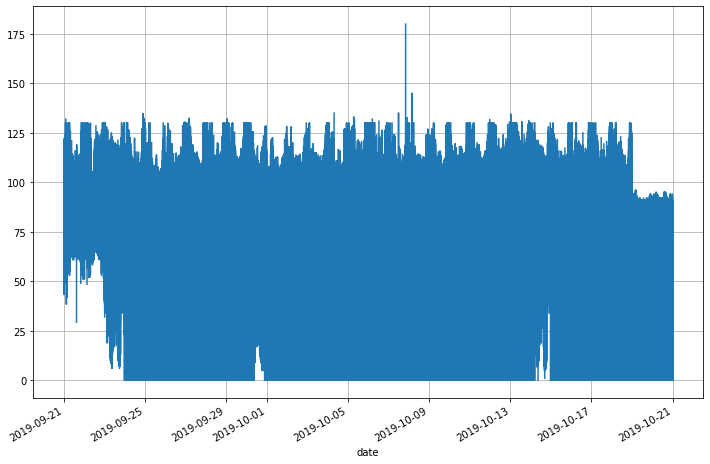

In [132]:
from datetime import datetime
#Regardons les deux mois avec le plus de relevés (septembre et octobre 2019)
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2018, 9, 1)
end_date = datetime (2019, 10, 30 )
df_time['speed'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

Interprétation: Dans l'ensemble du jeu de données, il n'y a des données de vitesse que pour la période allant du 20/09/2019 au 21/10/2019

## Etude de la cinquième colonne: "occupancy_[%]"

In [95]:
df_timeseries['occupancy_[%]'].value_counts()

Series([], Name: occupancy_[%], dtype: int64)

Colonne vide

## Etude de la sixième colonne: "TV/h"
TV/h correspond au nombre total de véhicule ayant déclenché le capteur sur une période d'une heure

In [135]:
df_timeseries['TV/h'].value_counts()

0.0       10766
10.0       8755
20.0       7633
30.0       6341
40.0       5525
          ...  
6210.0        1
6100.0        1
6240.0        1
6440.0        1
6180.0        1
Name: TV/h, Length: 624, dtype: int64

In [136]:
df_timeseries['TV/h'].describe()

count    322510.000000
mean       1081.655018
std        1326.886136
min           0.000000
25%         160.000000
50%         450.000000
75%        1470.000000
max        6440.000000
Name: TV/h, dtype: float64

In [139]:
#Vérification du nombre de valeurs manquantes
df_timeseries['TV/h'].isnull().sum()/len(df_timeseries)*100

35.27937372444116

35% des données sont manquantes

<AxesSubplot:xlabel='date'>

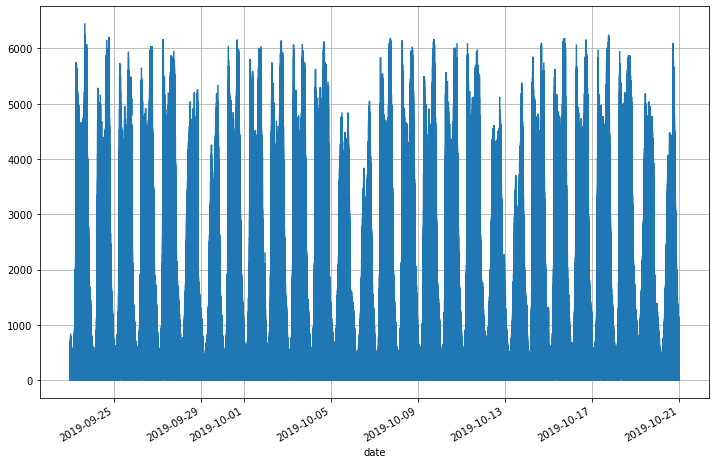

In [153]:
from datetime import datetime
#Regardons la distribution de TV/h sur les deux mois avec le plus de relevés (septembre et octobre 2019)
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2019, 9, 1)
end_date = datetime (2019, 10, 30 )
df_time['TV/h'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

<AxesSubplot:xlabel='date'>

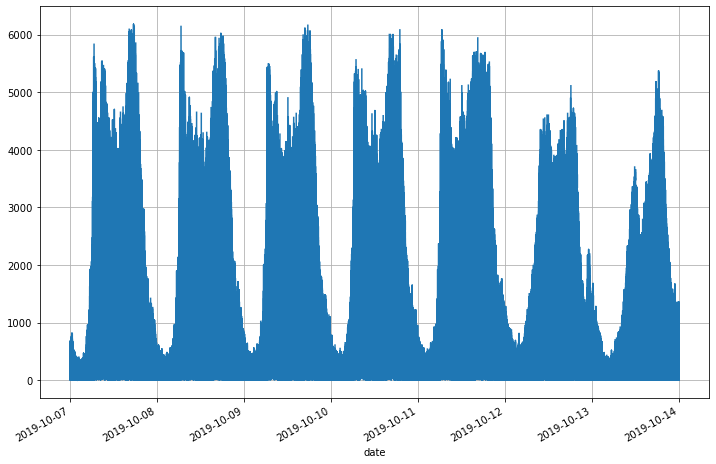

In [143]:
#Regardons la distribution de TV/h sur une semaine
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2019, 10, 7)
end_date = datetime (2019, 10, 14 )
df_time['TV/h'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

Intreprétation: Les données semblent cohérentes, des paternes se repettent.

## Etude de la septième colonne: "PL/h"
PL/h correspond au nombre total de poids lourds ayant déclenché le capteur sur une période d'une heure

In [145]:
df_timeseries['PL/h'].value_counts()

0.0       6686
10.0      4872
20.0      4791
30.0      4324
40.0      3630
          ... 
1150.0       1
1430.0       1
1026.0       1
1870.0       1
2370.0       1
Name: PL/h, Length: 1082, dtype: int64

In [146]:
df_timeseries['PL/h'].describe()

count    142230.000000
mean        186.235182
std         204.710616
min           0.000000
25%          30.000000
50%         120.000000
75%         261.000000
max        2370.000000
Name: PL/h, dtype: float64

In [149]:
#Vérification du nombre de valeurs manquantes
df_timeseries['PL/h'].isnull().sum()/len(df_timeseries)*100

71.45758371779873

71.45% des données sont manquantes

<AxesSubplot:xlabel='date'>

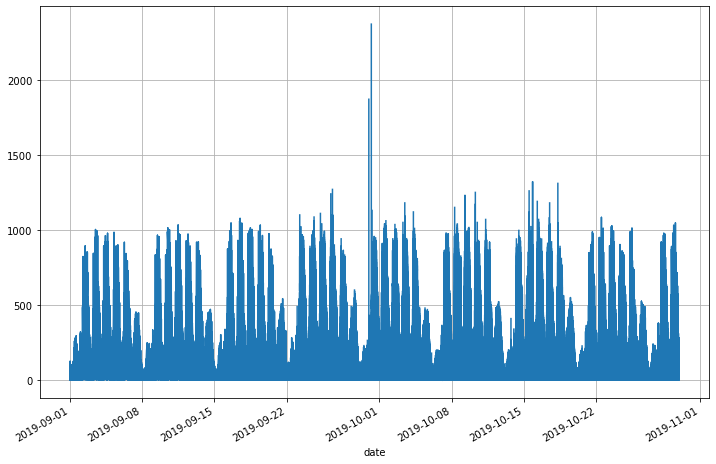

In [151]:
#Regardons la distribution de PL/h sur les deux mois avec le plus de relevés (septembre et octobre 2019)
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2019, 9, 1)
end_date = datetime (2019, 10, 30 )
df_time['PL/h'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

<AxesSubplot:xlabel='date'>

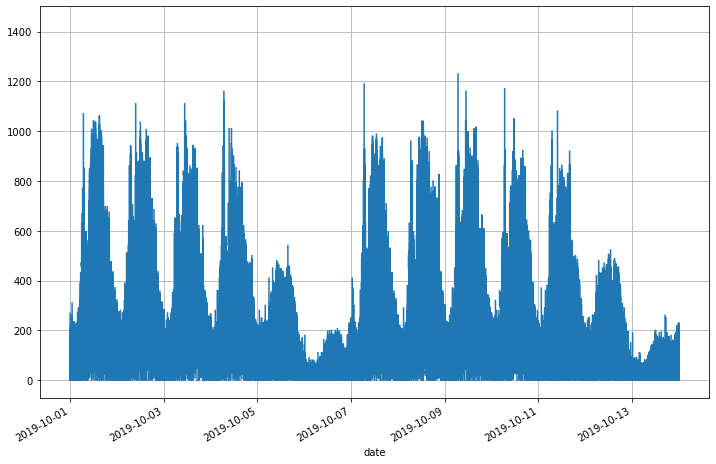

In [156]:
#Regardons  la distribution de PL/h sur deux semaines
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2019, 10, 1)
end_date = datetime (2019, 10, 14 )
df_time['PL/h'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

Interprétation: Les données semblent cohérentes, il semble y avoir quelques erreurs début octobre (valeurs extrèmes)

## Etude de la huitième colonne: "VL/h"
VL/h correspond au nombre total de véhicules légers ayant déclenché le capteur sur une période d'une heure

In [157]:
df_timeseries['VL/h'].value_counts()

0.0       1858
90.0       655
120.0      637
170.0      605
110.0      603
          ... 
5641.0       1
4287.0       1
5362.0       1
5309.0       1
5413.0       1
Name: VL/h, Length: 4937, dtype: int64

In [158]:
df_timeseries['VL/h'].describe()

count    142230.000000
mean       1527.649258
std        1288.975990
min           0.000000
25%         343.000000
50%        1190.000000
75%        2560.000000
max        6110.000000
Name: VL/h, dtype: float64

In [159]:
#Vérification du nombre de valeurs manquantes
df_timeseries['VL/h'].isnull().sum()/len(df_timeseries)*100

71.45758371779873

71.45% des données sont manquantes

<AxesSubplot:xlabel='date'>

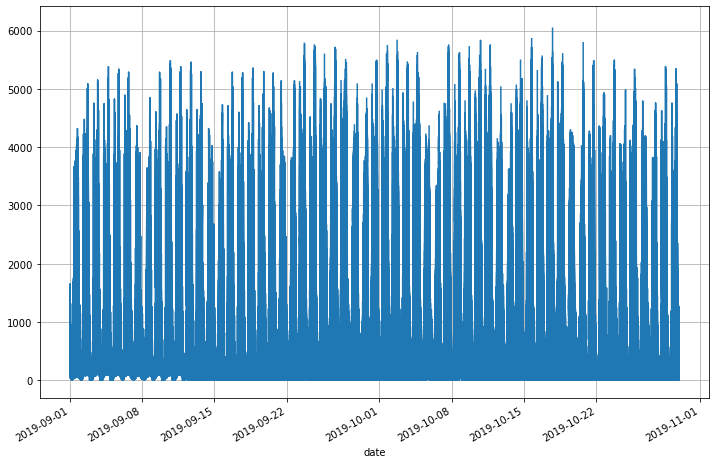

In [161]:
#Regardons la distribution de VL/h sur les deux mois avec le plus de relevés (septembre et octobre 2019)
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2019, 9, 1)
end_date = datetime (2019, 10, 30 )
df_time['VL/h'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

<AxesSubplot:xlabel='date'>

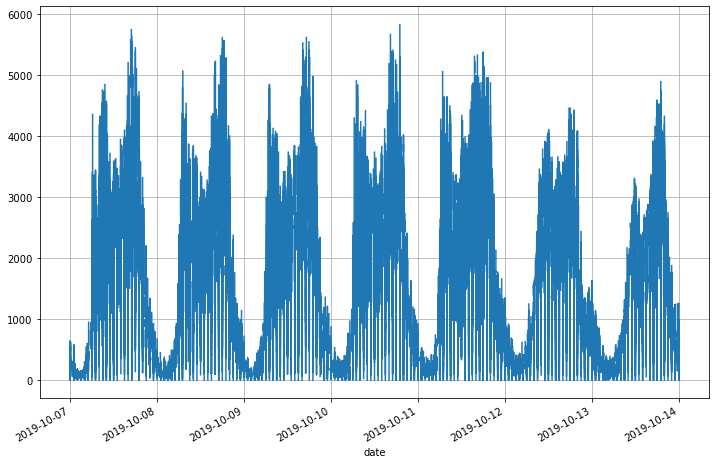

In [163]:
#Regardons  la distribution de VL/h sur une semaine
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
start_date = datetime (2019, 10, 7)
end_date = datetime (2019, 10, 14 )
df_time['VL/h'][(start_date <=df_time.index) & (df_time.index <= end_date)].plot(grid=True)

Intreprétation: Les données semblent cohérentes, des paternes se repettent.

## Etude de la neuvième colonne: "speed_per_lane"

In [165]:
df_timeseries['speed_per_lane'].value_counts()

[]    498311
Name: speed_per_lane, dtype: int64

Colonne vide

## Etude de la dixième colonne: "occupancy_per_lane"

In [166]:
df_timeseries['occupancy_per_lane'].value_counts()

[]    498311
Name: occupancy_per_lane, dtype: int64

Colonne vide

## Etude de la onzième colonne: "flow_per_lane_[veh/h]"

In [167]:
df_timeseries["flow_per_lane_[veh/h]"].value_counts()

[]    498311
Name: flow_per_lane_[veh/h], dtype: int64

Colonne vide

# Conclusion

Cette première exploration nous a permis de:  
    - Découvrir, comprendre et s'approprier nos jeux de données  
    - Identifier les colonnes vides  
    - Identifier les potentielles erreurs  
    - Travailler la temporalité du jeu de données et réduire la taille de notre jeu de données à deux mois (septembre & octobre 2019)  
    - Identifier les étapes suivantes: Visualiser l'emplacement des capteurs pour par la suite sélectionner des capteurs se trouvant sur la même route